In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [39]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [40]:
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)

In [41]:
trainX, testX, trainY, testY = train_test_split(X_pca, Y, test_size = 0.3,random_state=42)

In [42]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [71]:
model1= DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=11, random_state=0)
model3= SVC(kernel='linear' ,C=20, gamma='auto',probability=True)
model2=KNeighborsClassifier(n_neighbors=2)
model3=
model= VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],voting='soft', weights=[2, 1, 4])


In [72]:
model.fit(trainX,trainY);

In [73]:
ypred=model.predict(trainX)

In [74]:
c=accuracy_score(trainY,ypred)*100
c

99.64285714285714

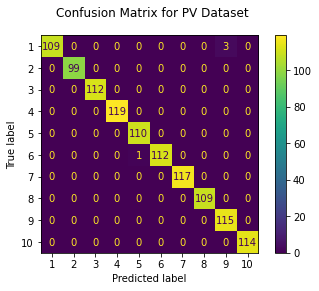

In [75]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [76]:
ypred1=model.predict(testX)

In [77]:
c1=accuracy_score(testY,ypred1)*100
c1

95.625

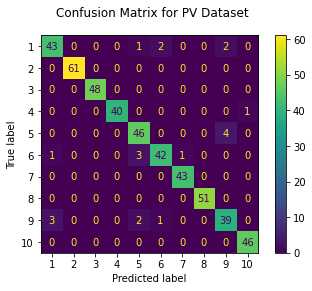

In [78]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [79]:
YR=np.concatenate((trainY,testY),axis=0)

In [80]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [81]:
ac2=accuracy_score(YR,YP)*100
ac2

98.4375

In [82]:
c2=confusion_matrix(YR,YP)
c2

array([[152,   0,   0,   0,   1,   2,   0,   0,   5,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 159,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0, 156,   0,   0,   0,   4,   0],
       [  1,   0,   0,   0,   4, 154,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [  3,   0,   0,   0,   2,   1,   0,   0, 154,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 160]], dtype=int64)